# Analyzing CIA Factbook Data Using SQL

  In this project, we'll work with data from the [CIA World Factbook,](https://www.cia.gov/library/publications/the-world-factbook/) a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

* population - The population as of 2015.
* population_growth - The annual population growth rate, as a percentage.
* area - The total land and water area.

In this guided project, we'll use SQL in Jupyter Notebook to explore and analyze data from this database. 

We'll use the following code to connect our Jupyter Notebook to our database file:

In [1]:
%load_ext sql
%sql sqlite:///factbook.db

'Connected: @factbook.db'

# Exploring the database file

In [2]:
%%sql
SELECT *
  FROM sqlite_master
 WHERE type='table';

 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


This code display the first five rows

In [3]:
%%sql
SELECT * 
  FROM facts
lIMIT 5;

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# The code gives the statistics of the columns

In [4]:
%%sql
SELECT MIN("population") min_pop, 
       MAX("population") max_pop, 
       MIN("population_growth") min_popgrowth,
       MAX("population_growth") max_popgrowth
  FROM facts;


 * sqlite:///factbook.db
Done.


min_pop,max_pop,min_popgrowth,max_popgrowth
0,7256490011,0.0,4.02


In [5]:
%%sql
SELECT *
  FROM facts
 WHERE population = (SELECT MIN("population") FROM facts);

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
%%sql
SELECT *
  FROM facts
 WHERE population = (SELECT Max("population") FROM facts);

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


The summary statistics codes above seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0. This seems to match the CIA Factbook [page for Antarctica:](https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html)


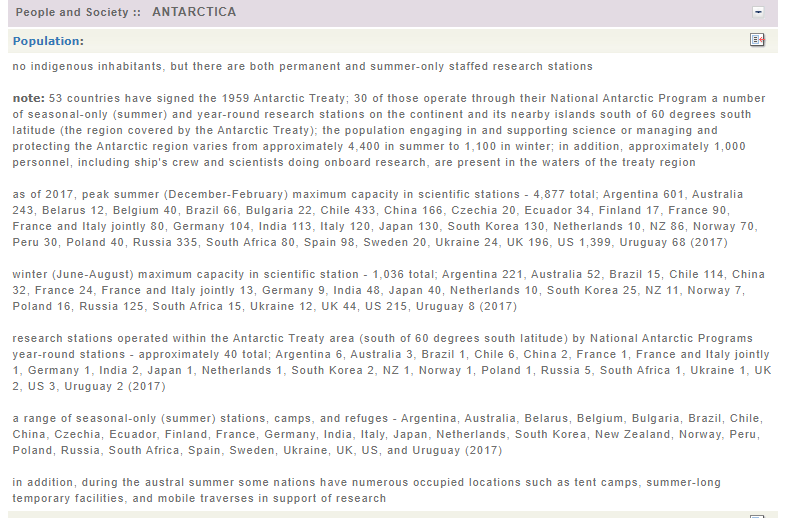

In [7]:
%%sql
SELECT MIN("population") min_pop, 
       MAX("population") max_pop, 
       MIN("population_growth") min_popgrowth,
       MAX("population_growth") max_popgrowth
  FROM facts
 WHERE name != "World"


 * sqlite:///factbook.db
Done.


min_pop,max_pop,min_popgrowth,max_popgrowth
0,1367485388,0.0,4.02


# Summary statistics revisited excluding world's population

In [8]:
%%sql
SELECT AVG("population") avg_pop, AVG("area") avg_area
  FROM facts;
    

 * sqlite:///factbook.db
Done.


avg_pop,avg_area
62094928.32231405,555093.546184739


# Densely populated countries

To conclude, we'll build on the query we wrote for the previous screen to find countries that are densely populated. We'll identify countries that have:

* Above average values for population.
* Below average values for area.

In [9]:
%%sql
SELECT * 
  FROM facts
 WHERE population > (
                      SELECT AVG("population") FROM facts
                    )
   AND area < (
                SELECT AVG("area") FROM facts
              );

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
14,bg,Bangladesh,148460,130170,18290,168957745,1.6,21.14,5.61,0.46
65,gm,Germany,357022,348672,8350,80854408,0.17,8.47,11.42,1.24
85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.0
138,rp,Philippines,300000,298170,1830,100998376,1.61,24.27,6.11,2.09
173,th,Thailand,513120,510890,2230,67976405,0.34,11.19,7.8,0.0
185,uk,United Kingdom,243610,241930,1680,64088222,0.54,12.17,9.35,2.54
192,vm,Vietnam,331210,310070,21140,94348835,0.97,15.96,5.93,0.3
